In [55]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.spatial.distance import cityblock

In [56]:
def get_data_tsp():
    data = pd.read_csv("datasets/tsp.csv").values
    return data[:, 1:]

In [57]:
def f(arr):
    s = 0;
    for i in range(len(arr) - 1):
        s+=cityblock(arr[i], arr[i + 1])
    return s

In [58]:
def plot(arr):
    path = []
    for i in range(2 * len(arr) - 1):
        path.append([arr[i // 2][0], arr[i // 2 + i % 2][1]])
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1])
    plt.scatter(arr[:, 0], arr[:, 1])
    plt.show()

In [59]:
def hill_climb111(points):
    result, min_len = None, None
    for iter in range(10000):
        path = []
        nv = []
        for i in range(len(points)):
            nv.append(i)
        for i in range(len(points) - 1, 0, -1):
            j = int(np.random.uniform(0, i + 1))
            x = nv[j]
            path.append(x)
            del nv[j]
        length = f(points[path])
        if min_len is None \
        or length < min_len:
            min_len = length
            result = path
    return points[path], min_len

In [64]:
def hill_climb(points):
    path_glob, min_len_glob = None, None
    np.random.shuffle(points)    
    for it in range(100):
        path, min_len = None, None
        j = int(np.random.uniform(0, len(points)))
        for i in range(points.shape[0]):
            if i == j:
                continue
            cur = []
            for k in range(len(points)):
                cur.append(points[k])
            cur = np.array(cur)
            cur[[j, i]] = cur[[i, j]]
            length = f(cur)
            if min_len is None \
            or length < min_len:
                path = cur
                min_len = length
        if min_len_glob is None \
            or min_len < min_len_glob:
                path_glob = path
                min_len_glob = min_len
    return path_glob, min_len_glob
    

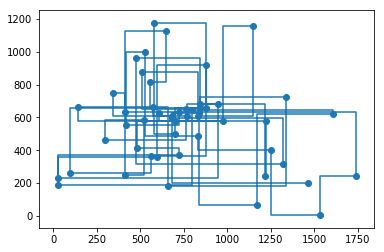

35045


In [65]:
points = get_data_tsp()
path, length = hill_climb(points)
plot(path)
print(length)